## Загрузка библиотек

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%pip install seaborn
import seaborn as sns
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Загрузка данных

In [4]:
!pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
  
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1lDBaeAnEXntW02PEAt_1nJLJteGdGof2'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

# assume the file is called file.csv and it's located at the root of your drive
downloaded.GetContentFile('train.csv')

train_df = pd.read_csv('train.csv')
train_df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1m6C2PO2wu5zJv7wkJ-CHVcArZr33PKKv'
downloaded = drive.CreateFile({'id': file_id})



downloaded.GetContentFile('test.csv')

test_df= pd.read_csv("test.csv")
test_df.sample(10)

,id,date,store_nbr,family,onpromotion
3373,3004261,2017-08-17,53,CLEANING,7
21131,3022019,2017-08-27,51,FROZEN FOODS,0
1457,3002345,2017-08-16,5,BREAD/BAKERY,12
1607,3002495,2017-08-16,53,MAGAZINES,0
18761,3019649,2017-08-26,35,HOME APPLIANCES,0
27824,3028712,2017-08-31,4,BREAD/BAKERY,9
24215,3025103,2017-08-29,38,PET SUPPLIES,0
23395,3024283,2017-08-29,15,SCHOOL AND OFFICE SUPPLIES,3
25552,3026440,2017-08-30,26,EGGS,0
14506,3015394,2017-08-24,16,LADIESWEAR,0


In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1nrNdAXEVSFHVn70fvR6OMAFDGEpN46LB'
downloaded = drive.CreateFile({'id': file_id})



downloaded.GetContentFile('oil.csv')

oil_df= pd.read_csv("oil.csv")
oil_df.sample(10)

,date,dcoilwtico
320,2014-03-25,99.66
818,2016-02-19,29.59
864,2016-04-25,41.67
63,2013-03-29,NaN
636,2015-06-10,61.36
1083,2017-02-24,53.99
1012,2016-11-17,45.37
998,2016-10-28,48.72
924,2016-07-18,45.23
879,2016-05-16,47.72


In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1xS_VD0EFozxhX0ZbiJbCni7QOoWlhNTJ'
downloaded = drive.CreateFile({'id': file_id})



downloaded.GetContentFile('holidays.csv')

holidays_df = pd.read_csv("holidays.csv")
holidays_df.sample(10)

,date,type,locale,locale_name,description,transferred
18,2012-10-07,Holiday,Local,Quevedo,Cantonizacion de Quevedo,False
153,2014-12-23,Additional,National,Ecuador,Navidad-2,False
206,2015-12-23,Additional,National,Ecuador,Navidad-2,False
222,2016-04-19,Event,National,Ecuador,Terremoto Manabi+3,False
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
224,2016-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
239,2016-05-04,Event,National,Ecuador,Terremoto Manabi+18,False
191,2015-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
97,2014-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
221,2016-04-18,Event,National,Ecuador,Terremoto Manabi+2,False


In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1e4qy8h6263rGqy0cq6AXAnnW-PLdzxeq'
downloaded = drive.CreateFile({'id': file_id})



downloaded.GetContentFile('stores.csv')

stores_df = pd.read_csv("stores.csv")
stores_df.sample(10)

,store_nbr,city,state,type,cluster
38,39,Cuenca,Azuay,B,6
22,23,Ambato,Tungurahua,D,9
44,45,Quito,Pichincha,A,11
16,17,Quito,Pichincha,C,12
43,44,Quito,Pichincha,A,5
32,33,Quevedo,Los Rios,C,3
28,29,Guayaquil,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10
29,30,Guayaquil,Guayas,C,3
5,6,Quito,Pichincha,D,13


## Взглянем на данные

In [10]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


1.Тип данных столбца 'date' в train_df и holiday_df - нужно привести к формату datetime64.

2.Столбец 'type' в holiday_df не несет смысловой нагрузки, его можно удалить.

3.Столбец 'transferred' в holiday_df можно перевести из типа True/False в 1/0.

4.Столбцы id также подлежат удалению перед обучением моделей. 

## Слияние данных

Общие колонки у датасетов:
- train_df и oil_df：date
- train_df и stores_df：store_nbr
- train_df и holidays_df：date

In [14]:
train_df = pd.merge(train_df, oil_df, how='left', on='date')
train_df = pd.merge(train_df, stores_df, how='left', on='store_nbr')
holidays_df.rename(columns={'type': 'holidays_type'}, inplace=True)
train_df = pd.merge(train_df, holidays_df, how='left', on='date')


Удалим ненужные таблицы

In [15]:

del holidays_df, oil_df, stores_df

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   date           object 
 2   store_nbr      int64  
 3   family         object 
 4   sales          float64
 5   onpromotion    int64  
 6   dcoilwtico     float64
 7   city           object 
 8   state          object 
 9   type           object 
 10  cluster        int64  
 11  holidays_type  object 
 12  locale         object 
 13  locale_name    object 
 14  description    object 
 15  transferred    object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


## Взглянем на пропуски в данных

In [16]:
train_df.isnull().sum()

id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
dcoilwtico        955152
city                   0
state                  0
type                   0
cluster                0
holidays_type    2551824
locale           2551824
locale_name      2551824
description      2551824
transferred      2551824
dtype: int64

In [17]:
train_df.isnull().sum() / train_df.shape[0]

id               0.000000
date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
dcoilwtico       0.312719
city             0.000000
state            0.000000
type             0.000000
cluster          0.000000
holidays_type    0.835473
locale           0.835473
locale_name      0.835473
description      0.835473
transferred      0.835473
dtype: float64

Удалим столбцы с пропусками в данных более 80%. 

In [18]:

null_percent = train_df.isnull().sum() / train_df.shape[0]
null_80_column = null_percent[null_percent > 0.8].index
train_df = train_df.drop(columns=null_80_column, axis=1)

In [19]:
train_df['dcoilwtico'].describe()

count    2.099196e+06
mean     6.801587e+01
std      2.569134e+01
min      2.619000e+01
25%      4.641000e+01
50%      5.343000e+01
75%      9.581000e+01
max      1.106200e+02
Name: dcoilwtico, dtype: float64

Заполним пропуски колонки 'dcoilwtico'

In [20]:
train_df['dcoilwtico'] = train_df['dcoilwtico'].fillna(train_df['dcoilwtico'].mode()[0])

Удалим дубликаты в данных

In [21]:
train_df = train_df.drop(columns=['id'], axis=1)
train_df.duplicated().any()

True

In [22]:
train_df.duplicated().sum()

53460

In [23]:
train_df = train_df.drop_duplicates()

In [24]:
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

## Исследовательский анализ данных

## Посмотрим на распределение данных по графикам.

Text(0.5, 1.0, 'Топ-10 категорий продуктов')

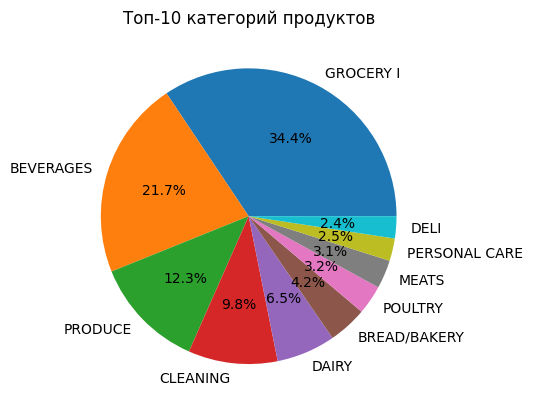

In [25]:
family_sales_group = train_df.groupby(by=['family'])['sales'].sum()
family_sales_group = family_sales_group.sort_values(ascending=False)
plt.pie(family_sales_group[:10], labels=family_sales_group[:10].index, autopct='%1.1f%%')
plt.title('Топ-10 категорий продуктов')

Топ-10 категорий продуктов с наибольшим кол-вом продаж

1. Grocery
2. Beverages
3. Produce
4. Cleaning
5. Dairy
6. Bread/Bakery
7. Poultry
8. Meats
9. Personal Care
10. Deli

Text(0.5, 1.0, 'Топ-10 продаж по штату')

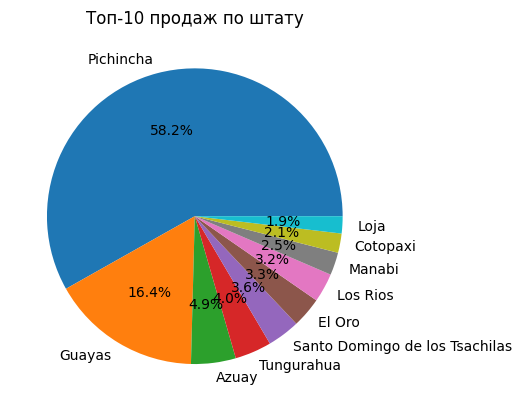

In [26]:
state_sales_group = train_df.groupby(by=['state'])['sales'].sum()
state_sales_group = state_sales_group.sort_values(ascending=False)
plt.pie(state_sales_group[:10], labels=state_sales_group[:10].index, autopct='%1.1f%%')
plt.title('Топ-10 продаж по штату')

Топ-10 штатов с наибольшим кол-вом продаж

1. Pinchicha
2. Guayas
3. Azuay
4. Tungurahua
5. Santa Domingo de los Tsachilas
6. El Oro
7. Los Rios
8. Manabi
9. Cotopaxi
10. Loja

NameError: ignored

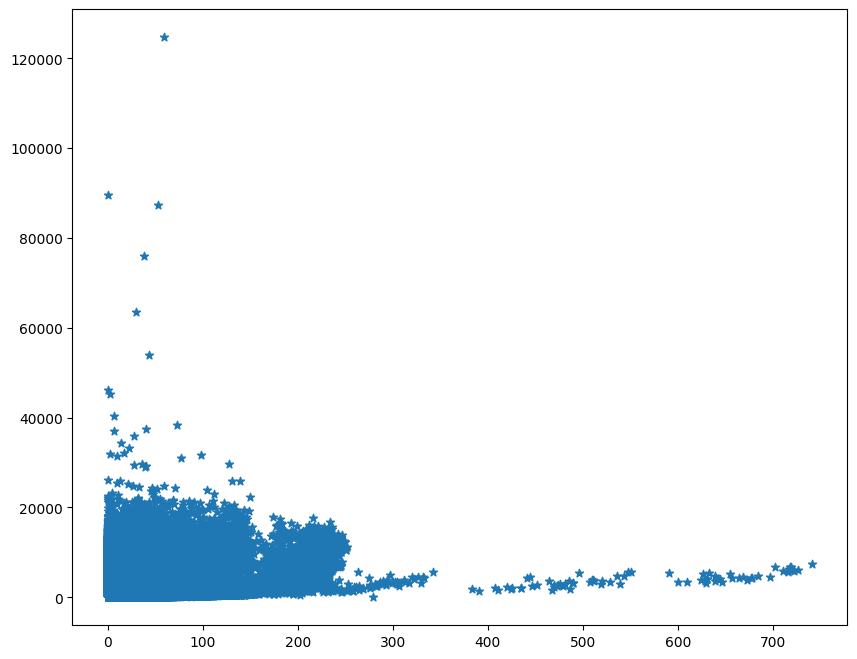

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(train_df['onpromotion'], train_df['sales'], marker='*')
ax.set_xlabel('On Promotion')
ax.set_ylabel('Sales')
plt.title('Топ-10 продаж по городу')

Text(0.5, 1.0, 'The highest Sales by City of top 10')

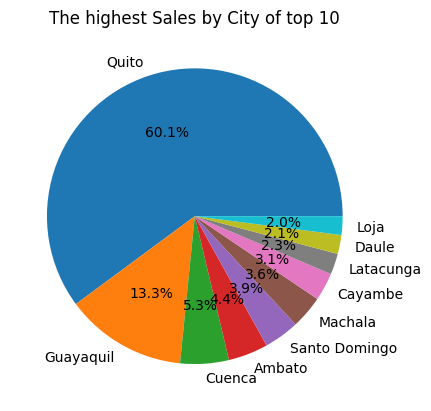

In [28]:
city_sales_group = train_df.groupby(by=['city'])['sales'].sum()
city_sales_group = city_sales_group.sort_values(ascending=False)
plt.pie(city_sales_group[:10], labels=city_sales_group[:10].index, autopct='%1.1f%%')
plt.title('The highest Sales by City of top 10')


Топ - 10 городов с наибольшим кол-вом продаж

1. Quito
2. Guayaquil
3. Cuenca
4. Ambato
5. Santo Domingo
6. Machala
7. Cayambe
8. Latacunga
9. Daule
10. Loja

Text(0.5, 1.0, 'Кол-во продаж в Quito City')

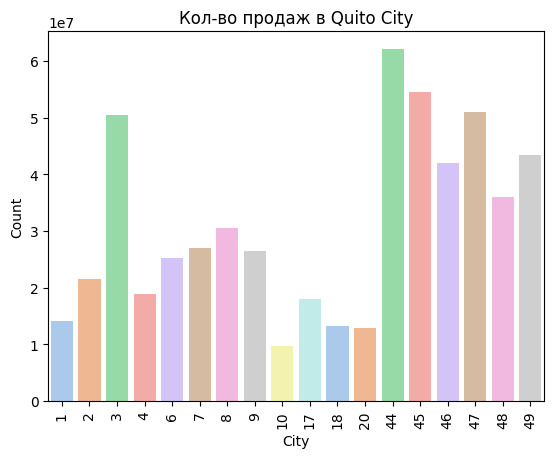

In [29]:
quito_store_df = train_df[train_df['city'] == 'Quito']
quito_store_group = quito_store_df.groupby(by=['store_nbr'])['sales'].sum().reset_index()
ax = sns.barplot(quito_store_group, x='store_nbr', y='sales', palette=sns.color_palette('pastel'))
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Кол-во продаж в Quito City')

Text(0.5, 1.0, 'Количество акционной продукции в каждом магазине')

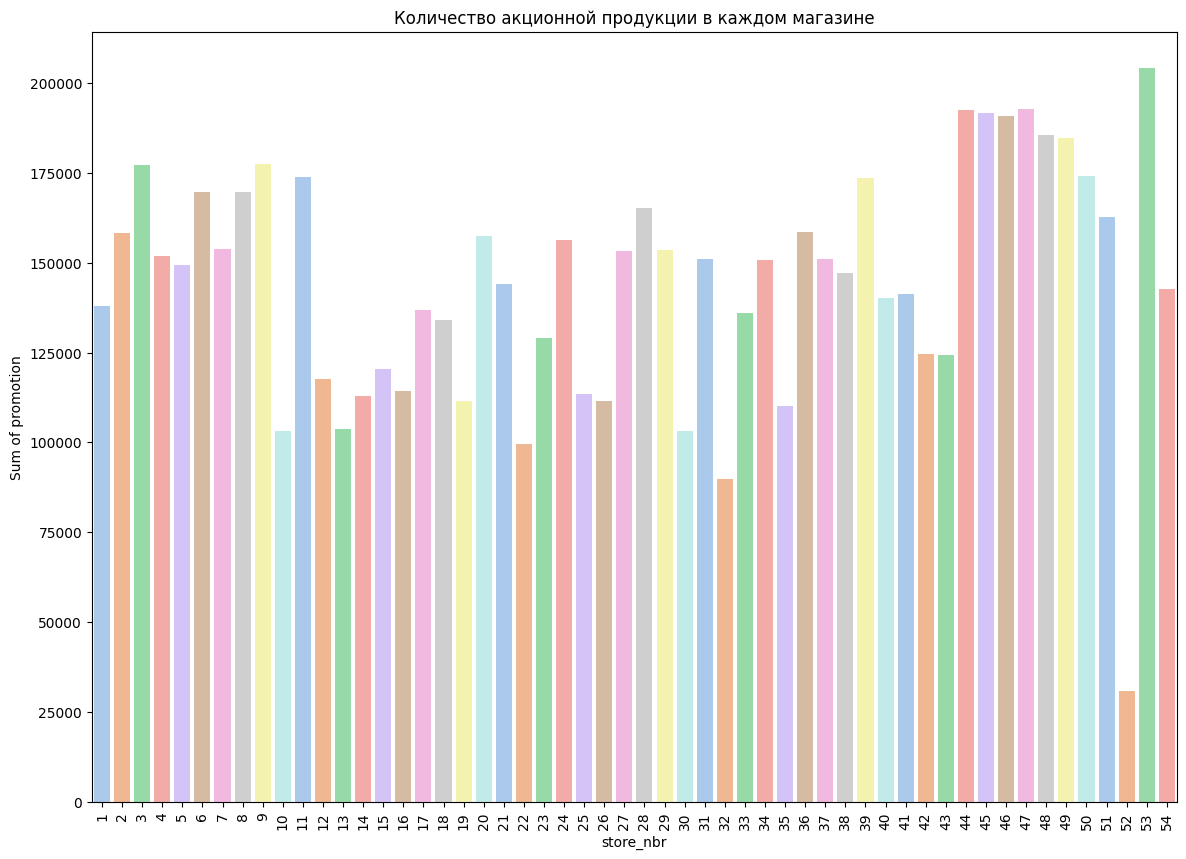

In [30]:
plt.figure(figsize=(14, 10))
onpromotion_sum_group = train_df.groupby(by=['store_nbr'])['onpromotion'].sum().reset_index()
ax = sns.barplot(onpromotion_sum_group, x='store_nbr', y='onpromotion', palette=sns.color_palette('pastel'))
ax.set_xlabel('store_nbr')
ax.set_ylabel('Sum of promotion')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Количество акционной продукции в каждом магазине')

Text(0.5, 1.0, 'Влияние акций на продажи')

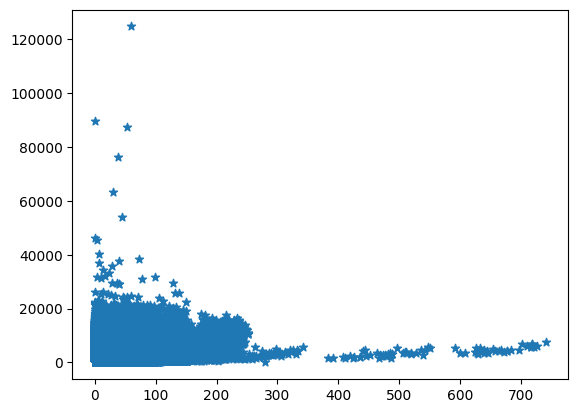

In [31]:
plt.scatter(train_df['onpromotion'], train_df['sales'], marker='*')
ax.set_xlabel('On Promotion')
ax.set_ylabel('Sales')
ax.set_title('Влияние акций на продажи')


Видно, что с увеличением количества продуктов на скидках - значительного роста продаж не происходит.

Построим график продаж от года к году

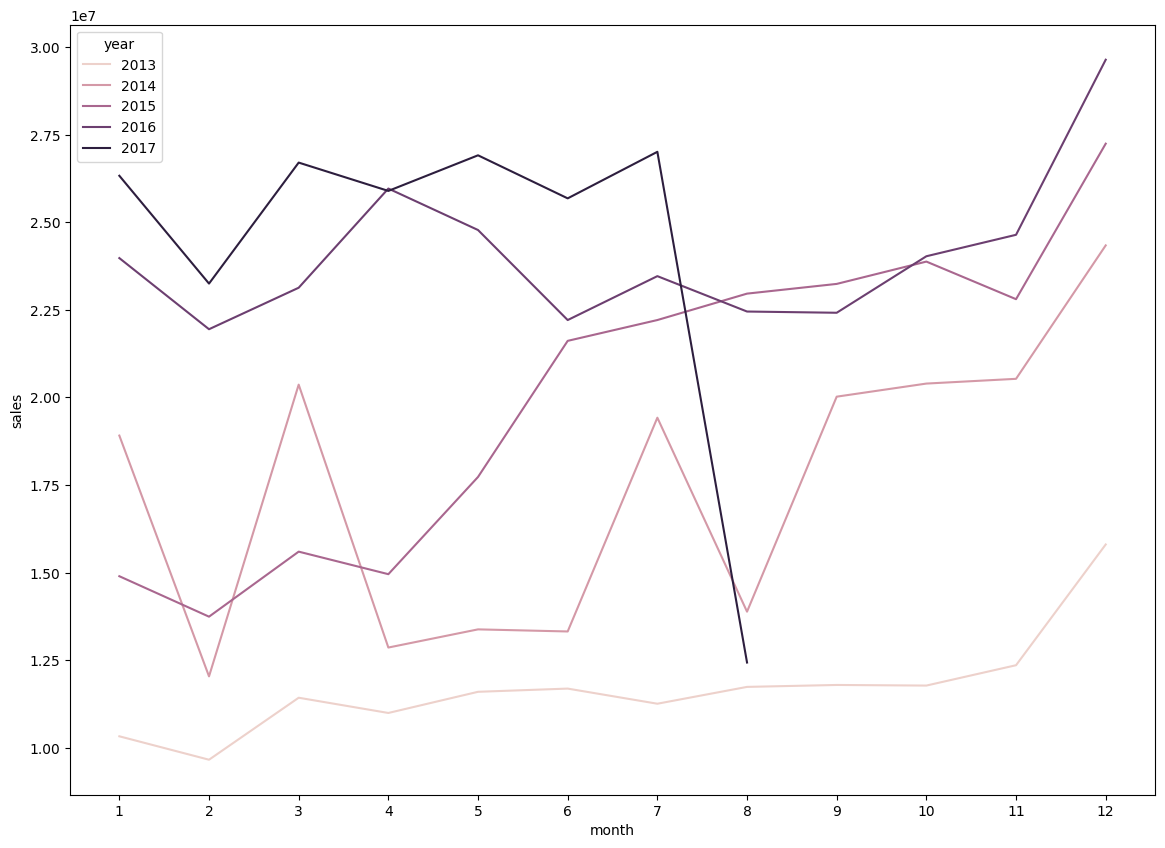

In [32]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

month_sales_group = train_df.groupby(by=['year', 'month'])['sales'].sum()
pd.DataFrame(month_sales_group)

plt.figure(figsize=(14, 10))
ax = sns.lineplot(pd.DataFrame(month_sales_group), x='month', y='sales', hue='year')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1, 13), labels=list(range(1, 13)))

### Взглянем на временные ряды

In [33]:
train_df = train_df.groupby(by=['date'])['sales', 'onpromotion'].sum().reset_index()

<ipython-input-33-38b7c9bcf1f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_df = train_df.groupby(by=['date'])['sales', 'onpromotion'].sum().reset_index()


<Axes: xlabel='date'>

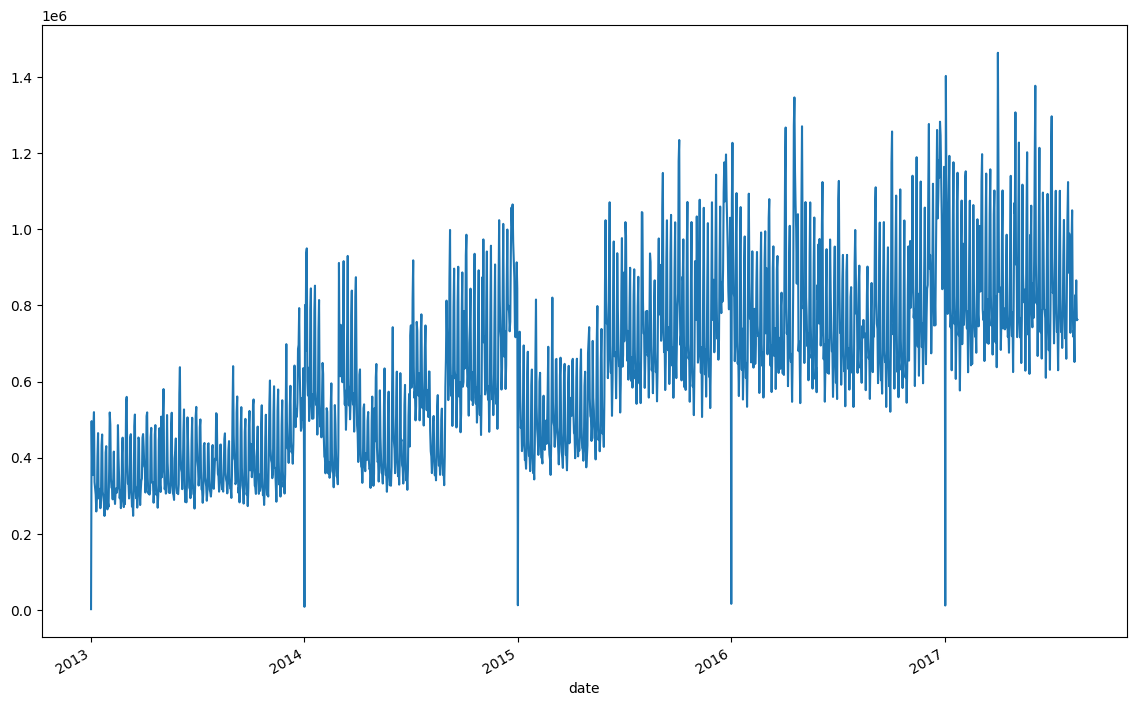

In [34]:
train_df.index = train_df['date']
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
train_df['sales'].plot(color='C0', ax=ax)

Судя по графику - есть влияние сезонности и тренда на увеличение продаж. Предварительно, можно сделать вывод, что это нестационарный временной ряд.

#### Тест Дики-Фуллера

Тест ADF оценивает нулевую гипотезу о том, что временной ряд имеет единичный корень, что указывает на нестационарность. Альтернативная гипотеза состоит в том, что временной ряд является стационарным.

При выполнении теста ADF мы получаем статистику ADF и значение p. Статистика ADF представляет собой отрицательное число, и чем оно более отрицательное, тем сильнее свидетельство против нулевой гипотезы. Значение p представляет собой вероятность наблюдения статистики ADF или более экстремального значения, если бы нулевая гипотеза была верна. Низкое значение p (ниже выбранного уровня значимости, обычно 0,05) указывает на убедительные доказательства против нулевой гипотезы и предполагает, что временной ряд является стационарным.

In [36]:

adf_result = adfuller(train_df['sales'])
print(f'p-value:{adf_result[1]}')


kpss_result = kpss(train_df['sales'])
print(f'p-value:{kpss_result[1]}')

p-value:0.08969592175787444
p-value:0.01


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Гипотеза о том, что временной ряд нестационарен - подтвердилась, т.к. p-value > 0.05.

### Дифферинцирование

In [37]:
train_df['diff_sales'] = train_df['sales'].diff(1)
train_df = train_df.dropna()

In [38]:
# Проверим стационарность на тесте Дики-Фуллера
adf_result = adfuller(train_df['diff_sales'])
print(f'p-value:{adf_result[1]}')


p-value:4.573768417346642e-21


### ARIMA Model

In [39]:
arima_model = ARIMA(train_df['diff_sales'], order=(2, 1, 1)).fit()
arima_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             diff_sales   No. Observations:                 1683
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -22481.364
Date:                Wed, 24 May 2023   AIC                          44970.727
Time:                        12:06:21   BIC                          44992.438
Sample:                             0   HQIC                         44978.769
                               - 1683                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0848      0.023     -3.693      0.000      -0.130      -0.040
ar.L2         -0.3752      0.025    -14.764      0.000      -0.425      -0.325
ma.L1         -0.9993      0.032    -31.069      0.000      -1.062      -0.936
sigma2      3.382e+10   7.15e-13   4.73e+22      0.000    3.38e+10    3.38e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.10   Jarque-Bera (JB):              3003.26
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+37. Standard errors may be unstable.
"""

#### Построим предсказание

In [40]:
start = train_df.shape[0]
end = train_df.shape[0] + test_df.shape[0] - 1
prediction_value = arima_model.predict(start=start, end=end)
prediction_value

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1683     39623.302086
1684     -3529.275900
1685    -14080.535141
1686      3003.811429
1687      5512.724046
             ...     
30190      332.273143
30191      332.273143
30192      332.273143
30193      332.273143
30194      332.273143
Name: predicted_mean, Length: 28512, dtype: float64

#### Вычислим метрики ошибок

In [41]:
prediction_value = prediction_value[:len(train_df['diff_sales'])]
mae = np.mean(np.abs(prediction_value.values - train_df['diff_sales'].values))
mse = np.mean((prediction_value.values - train_df['diff_sales'].values) ** 2)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 116267.21252726871
MSE: 25537153041.30868
RMSE: 159803.48256940048
